# Framework
In this notebook we will introduce the [PennyLane](https://pennylane.readthedocs.io/en/stable/introduction/pennylane.html) framework that is a quantum computing framework focused on machine learning. For this reason Pennylane is our preffered choice. There are many others frameworks/toolkits: Qiskit (IBM), Forest, Q# (Microsoft), Braket (Amazon), Criq (Google), ProjectQ (ETH Zurich), Pytket(Cambridge Quantum Computing), XACC(Oak Ridge National Lab), Twist (MIT),...

In your own projects you can use whatever framework you like. For now there are no major differences, at least for the purpose of this introductory course.

In [28]:
%%capture
files = !ls
files = [f.split("  ") for f in files][0]

isFRIQML = 'fri_qml' in files
isFRIQMLPath = isFRIQML and "setup.py" in files

# Clone the entire repo. Only run once!
if not isFRIQML:
  !git clone -l -s https://github.com/znajob/fri_qml.git fri_qml

if not isFRIQMLPath:
  %cd fri_qml

!git pull
!pip install -e .

In [29]:
# Necessary imports
import pennylane as qml
from pennylane import numpy as np
from friqml.visualisation import plot_quantum_state, plot_histogram

An introduction to PennyLane basics can be found [here](https://pennylane.readthedocs.io/en/stable/introduction/pennylane.html).
The main building blocks of the PennyLane programs are quantum functions, that are essentially the entire quantum circuits that need to be run, and a device where the circuit will be run. The circuits should contain a sequence of quantum gates and output a tuple of measurements, probabilities or states. The device determines the number of qubits in the circuit and the number of measurements performed in order to calculate the averages.

# Initial state
The system is always initialised in the $|0\rangle$ state.

### Definition of the device

In [30]:
# Device
dev = qml.device('default.qubit', wires=1, shots=100)

### First circuit

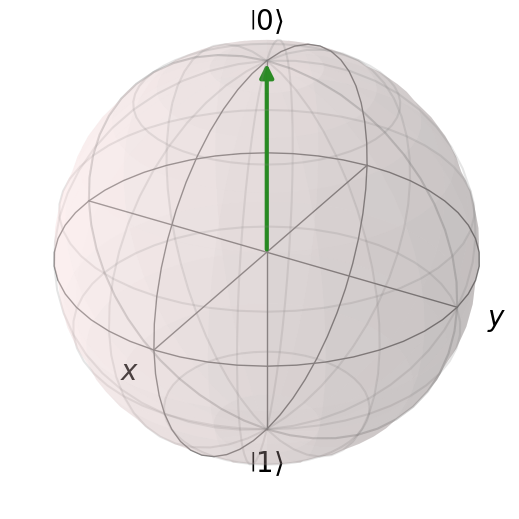

tensor([1.+0.j, 0.+0.j], requires_grad=True)

In [31]:
@qml.qnode(dev)
def circuit():
    return qml.state()
psi = circuit()
plot_quantum_state(psi)
psi

# Superposition
Applying one Haddamard gate $H=\frac{1}{\sqrt{2}}\begin{pmatrix}1&1\\1&-1\end{pmatrix}$ to the state $|0\rangle$ we get an equal superposition of states $|0\rangle$ and $|1\rangle$, namely $|\psi\rangle=\frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$.

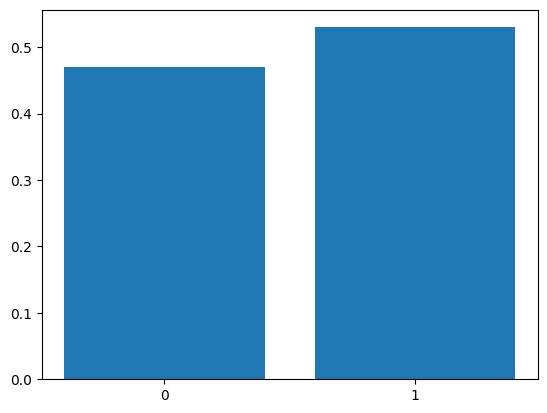

tensor([0.47, 0.53], requires_grad=True)

In [32]:
@qml.qnode(dev)
def superposition():
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

probs=superposition()
plot_histogram(probs)
probs

# Interference
Applying the Haddamard gate twice to the initial state we get the initial state back. We go through an intermediate state where the distribution of $|0⟩$ and $|1⟩$ is uniform to the final state where we again have a certain outcome $|0⟩$.

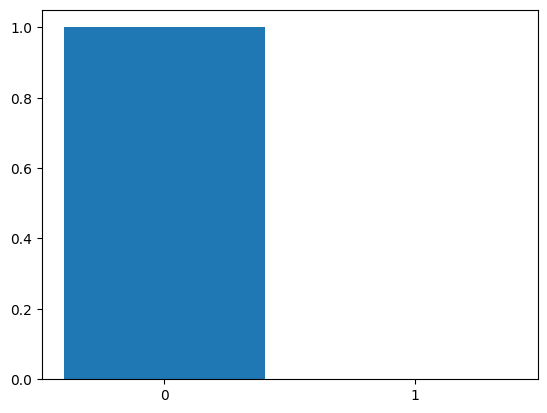

In [33]:
@qml.qnode(dev)
def interference():
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)
probs = interference()
plot_histogram(probs)


# More qubits and entanglement

With more than one qubit we can introduce quantum correlations. The most prominent quantum correlation is entanglement which is very interesting already with two qubits. We will start by constructing the entangled state $|\phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$. Notice, that we have to create a new device, since we now have two qubits.


In [48]:
# Device
dev = qml.device('default.qubit', wires=2, shots=None)

In [49]:
@qml.qnode(dev)
def entanglement():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0,1])

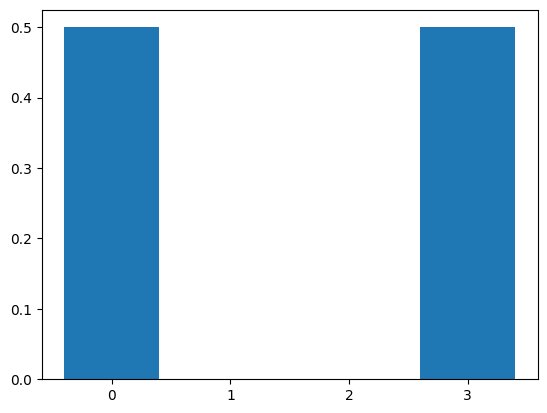

In [50]:
probs=entanglement()
plot_histogram(probs)

Since the qubits are entangled we never obtain the states $|01⟩$ and $|01⟩$. We are running the code on a simulator. If we run the same code on an actual NISQ device we get a non-vanishing probability to get the states $|01⟩$ and $|01⟩$ due to errors introduced by noise.

# Marginalna kvantna porazdelitev

In [52]:
@qml.qnode(dev)
def marginal_probability():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.probs(wires=[0])

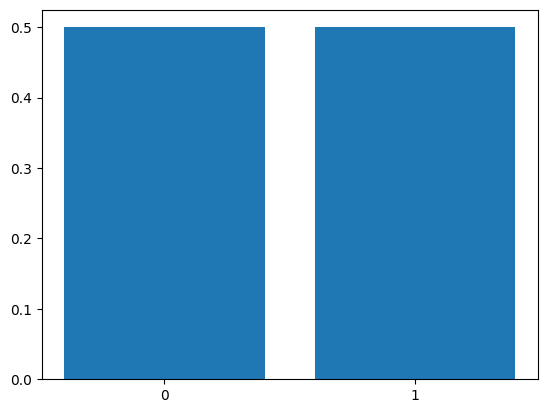

In [53]:
probs=marginal_probability()
plot_histogram(probs)

## Return counts

In [54]:
@qml.qnode(dev)
def counts():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0, 1])
    return qml.counts(qml.PauliZ(0)), qml.counts(qml.PauliZ(1))

In [55]:
counts()

QuantumFunctionError: The number of shots has to be explicitly set on the device when using sample-based measurements.

## Quantum operations

In [56]:
@qml.qnode(dev)
def parametrized_quantum_operations(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))

In [57]:
exp_val = parametrized_quantum_operations(np.pi/2, np.pi/2)
exp_val

tensor(2.22044605e-16, requires_grad=True)

In [58]:
dev = qml.device('default.qubit', wires=1, shots=None)

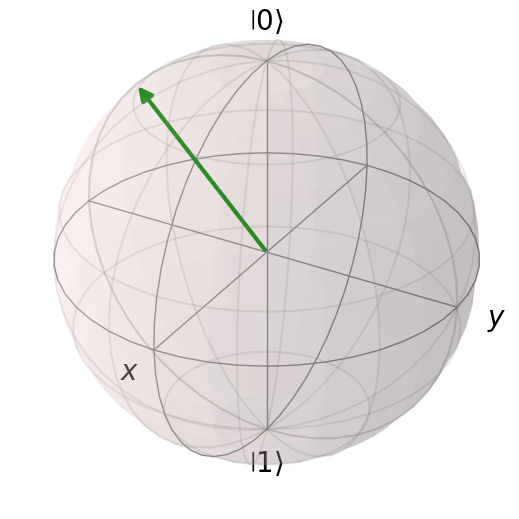

tensor([0.92387953+0.j        , 0.        -0.38268343j], requires_grad=True)

In [59]:
@qml.qnode(dev)
def rotation(x):
    qml.RX(x, wires=[0])
    return qml.state()

psi = rotation(np.pi/4)
plot_quantum_state(psi)
psi